In [115]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [116]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [117]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [118]:
print(f"Train Image Size: {train_images.shape}")
print(f"Train label Size: {train_labels.shape}")

print(f"Test Image Size: {test_images.shape}")
print(f"Test label Size: {test_labels.shape}")

Train Image Size: (60000, 28, 28)
Train label Size: (60000,)
Test Image Size: (10000, 28, 28)
Test label Size: (10000,)


### Data Exploration

In [119]:
train_images[0].max()

255

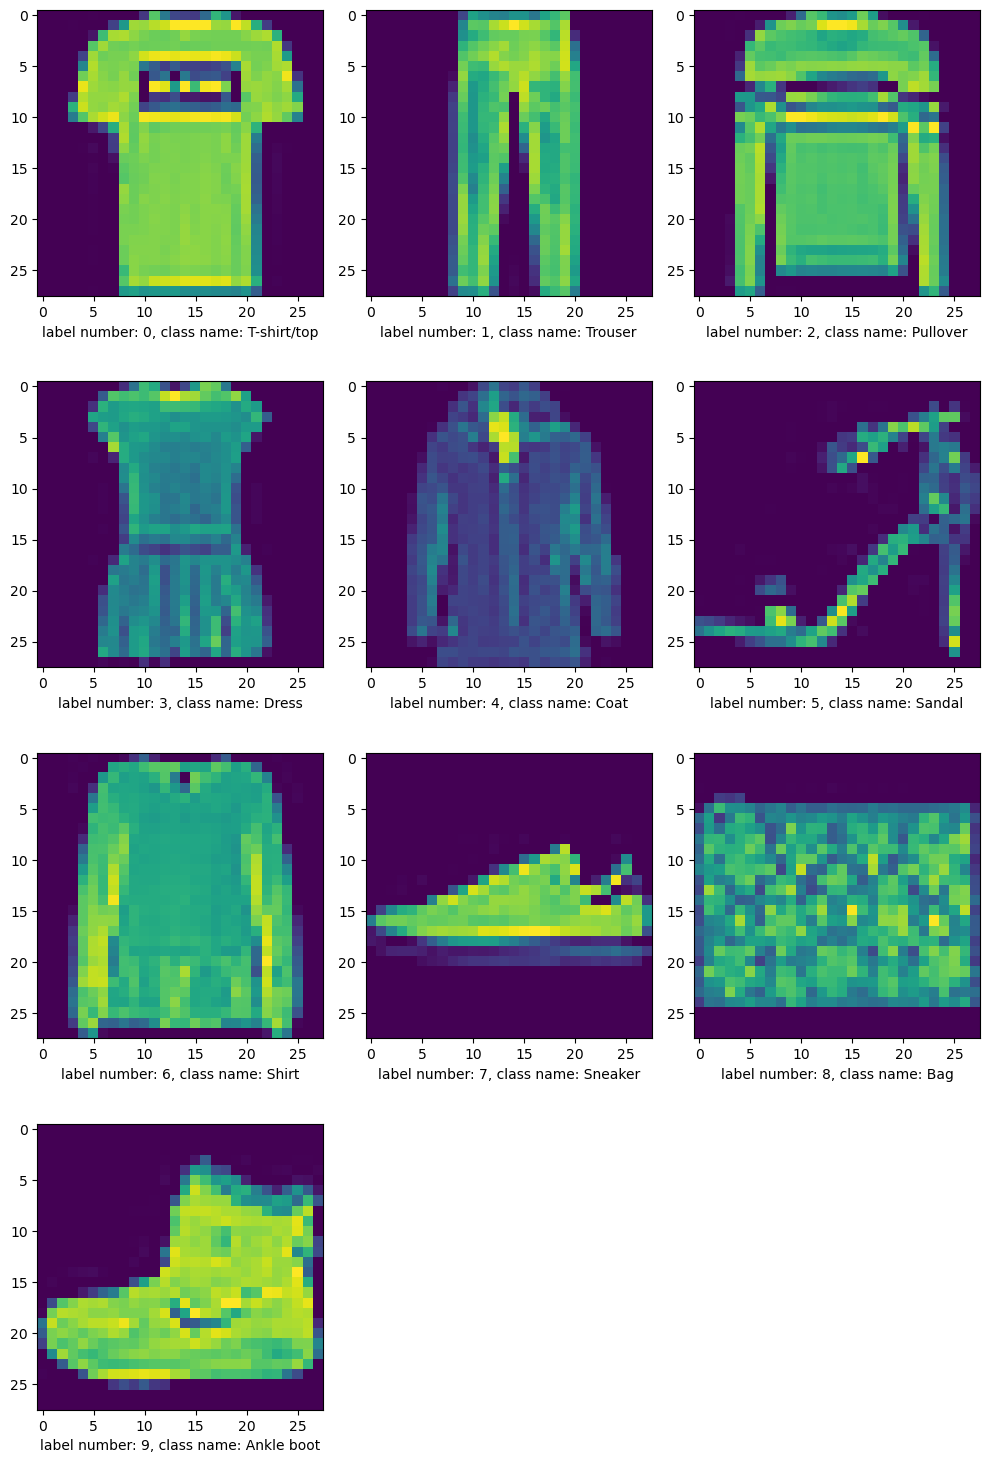

In [120]:
unique_values, indices = np.unique(train_labels, return_index=True)

fig, axs= plt.subplots(4, 3, figsize=(10, 15))
axs= axs.flatten()
for (unique_value, index) in (zip(unique_values, indices)):
    axs[unique_value].imshow(train_images[index])
    axs[unique_value].set_xlabel(f"label number: {unique_value}, class name: {class_names[unique_value]}")
    # print(f"{unique_value}, {class_names[unique_value]}: {index}")

# Leave the last two plots empty
for i in range(10, 12):  # Optional: Remove axes
    axs[i].axis('off')


plt.tight_layout()
plt.show()

In [121]:
#Normalization in the range of [0 - 1]
train_images = train_images / 255.0

test_images = test_images / 255.0

In [122]:
# One hot encoding, 
encoder = OneHotEncoder(sparse_output= False)

train_labels_onehot = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_onehot = encoder.transform(test_labels.reshape(-1, 1))

In [123]:
print(train_labels.reshape(-1, 1).shape)
print(train_labels_onehot.shape)

(60000, 1)
(60000, 10)


In [124]:
gpu_devices = tf.config.list_physical_devices('GPU')

if not gpu_devices:
    print("TensorFlow is using the CPU.")
else:
    print(f"TensorFlow is using the following GPU(s): {gpu_devices}")

TensorFlow is using the following GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Model Development:
shallow neural network

In [125]:
shallow_nn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/home/buddha-thapa-magar/anaconda3/envs/ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:
shallow_nn_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [127]:
shallow_nn_model.fit(train_images, train_labels_onehot, epochs=10, batch_size= 32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7854 - loss: 0.6224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8607 - loss: 0.3809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8749 - loss: 0.3398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8844 - loss: 0.3133
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8914 - loss: 0.2933
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8942 - loss: 0.2829
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8994 - loss: 0.2696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9049 - loss: 0.2566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9075 - loss: 0.2456
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9115 - loss: 0.2370


In [128]:
snn_test_loss, snn_test_acc = shallow_nn_model.evaluate(test_images,  test_labels_onehot, verbose=2)

print('\nTest accuracy:', snn_test_acc)
snn_test_loss

313/313 - 1s - 4ms/step - accuracy: 0.8795 - loss: 0.3476

Test accuracy: 0.8794999718666077


0.34759604930877686

In [129]:
snn_probability_model = tf.keras.Sequential([shallow_nn_model, tf.keras.layers.Softmax()])

In [130]:
snn_prediction_result_softmax= snn_probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [131]:
snn_prediction_result_softmax[1]

array([4.1286066e-06, 1.7158900e-12, 9.9906200e-01, 1.1433328e-11,
       5.7766453e-04, 9.8488481e-13, 3.5625618e-04, 2.2551428e-15,
       3.4971108e-09, 5.1548145e-14], dtype=float32)

In [132]:
snn_test_label_pred = np.argmax(snn_prediction_result_softmax, axis=1)  # Predicted labels

print(snn_test_label_pred[:10])
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [133]:
# Print a classification report for shallow neural network classification model
classification_report_snn = (classification_report(test_labels, snn_test_label_pred))
print(classification_report_snn)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.87      0.91      0.89      1000
           4       0.81      0.79      0.80      1000
           5       0.97      0.94      0.96      1000
           6       0.65      0.77      0.71      1000
           7       0.93      0.96      0.94      1000
           8       0.93      0.98      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



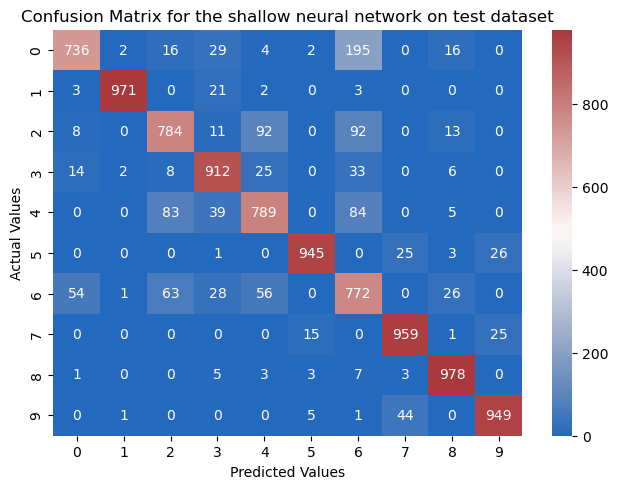

In [134]:
# Print a confusion matrix for shallow neural network on test dataset

confusion_matrix_snn= (confusion_matrix(test_labels, snn_test_label_pred))

sns.heatmap(data= confusion_matrix_snn,fmt='g', annot= True, cmap= "vlag")
plt.title("Confusion Matrix for the shallow neural network on test dataset")
plt.tight_layout()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

basic convolutional neural network (CNN)